<a href="https://colab.research.google.com/github/JosephPLim/Project-Classification/blob/main/ProjectIIEDAII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project II : Predicting Churn in Telephone Customers
##Student: Joseph Lim

This project aims to predict whether or not telephone customers will "churn" (leave) from a given phone company. The full dataset is [from Kaggle](https://www.kaggle.com/competitions/customer-churn-prediction-2020). Each row represents one customer, their data, and whether or not they churned. 

##Data Loading & Cleaning

###Import Libraries and File

In [1]:
#Basic Pandas and Numpy
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

#Classification Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
filename = "/content/drive/MyDrive/eLearning/CodingDojo - Data Science/Portfolio Projects/train.csv"
df = pd.read_csv(filename)

###Preliminary Data Cleaning

In [4]:
#Currently no columns that need to be removed
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [6]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [7]:
#Checking for inconsistencies in categorical values
for row in df:
  if df[row].dtypes == "object":
    print(df[row].value_counts())
    print("")

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

no     3854
yes     396
Name: international_plan, dtype: int64

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

no     3652
yes     598
Name: churn, dtype: int64



In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#Checking for missing values
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

##Exploratory Data Analyis (EDA)

In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

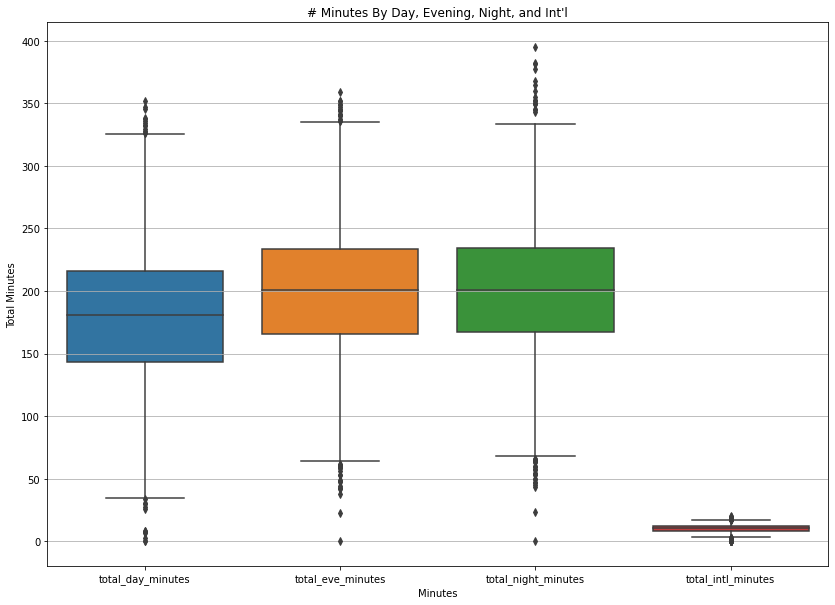

In [11]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_minutes", "total_eve_minutes", "total_night_minutes", "total_intl_minutes"]])

plt.title("# Minutes By Day, Evening, Night, and Int'l")
plt.xlabel("Minutes")
plt.ylabel("Total Minutes")
plt.grid(axis = "y")

The averages of minutes for day, evening, and night calls are roughly the same, around 200 total minutes per customers. There are a rather low number of international minutes being taken (< 50 overall).

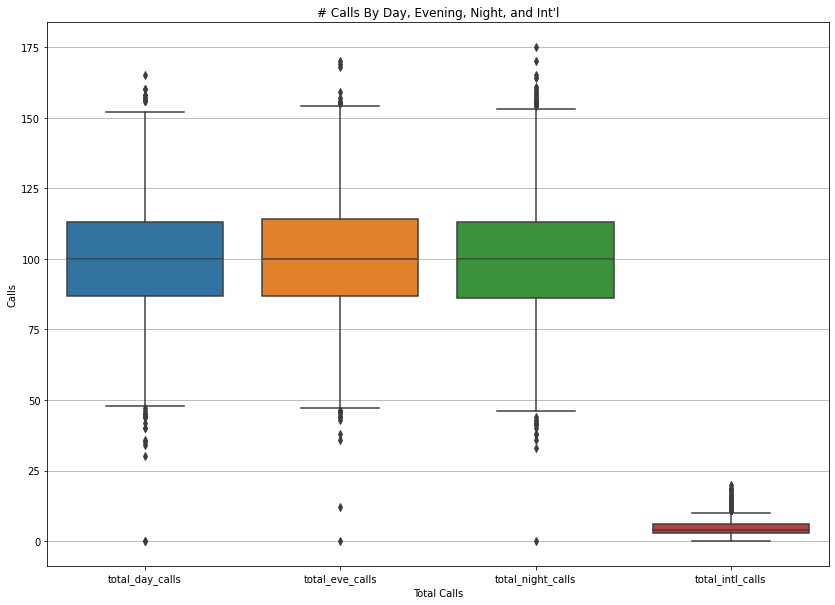

In [12]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_calls", "total_eve_calls", "total_night_calls", "total_intl_calls"]])

plt.title("# Calls By Day, Evening, Night, and Int'l")
plt.xlabel("Total Calls")
plt.ylabel("Calls")
plt.grid(axis = "y")

This shows that the average number of calls was roughly the same for day, evening, and night calls. However, there was a much lower number of international calls. I might end up removing the number of international calls column as a result of the very low number on average of them. 

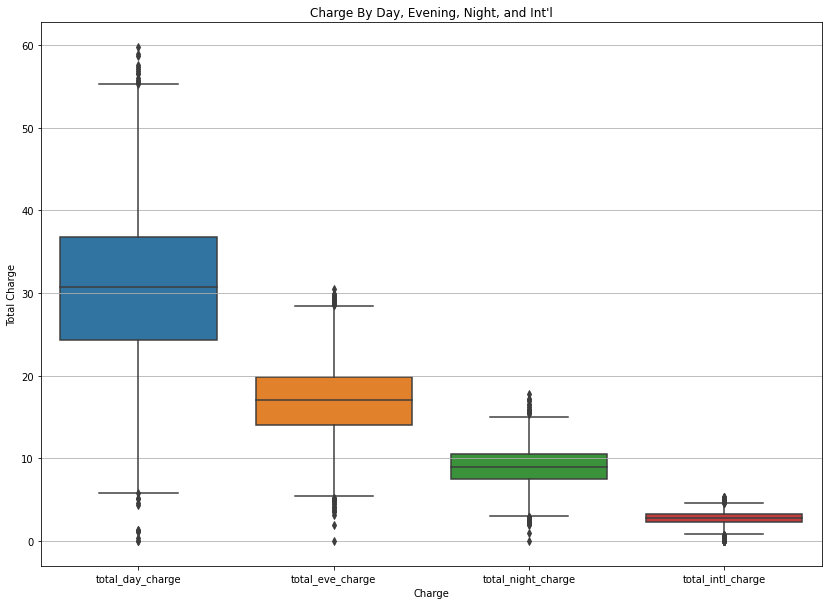

In [13]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.boxplot(data = df[["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]])

plt.title("Charge By Day, Evening, Night, and Int'l")
plt.xlabel("Charge")
plt.ylabel("Total Charge")
plt.grid(axis = "y")

This shows that customers paid the most on average for day calls. They also paid the least for international calls.

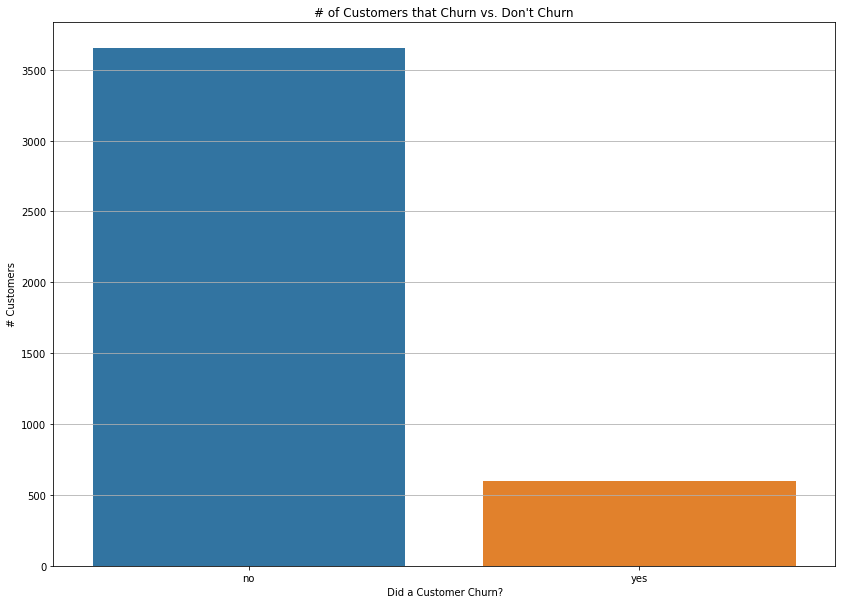

In [14]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.countplot(x = df["churn"])
plt.title("# of Customers that Churn vs. Don't Churn")
plt.xlabel(" Did a Customer Churn?")
plt.ylabel("# Customers")
plt.grid(axis = "y")

We can see here that the number of customers who churned were significantly less than those that did not churn. We should most likely stratify when we do a train-test split.

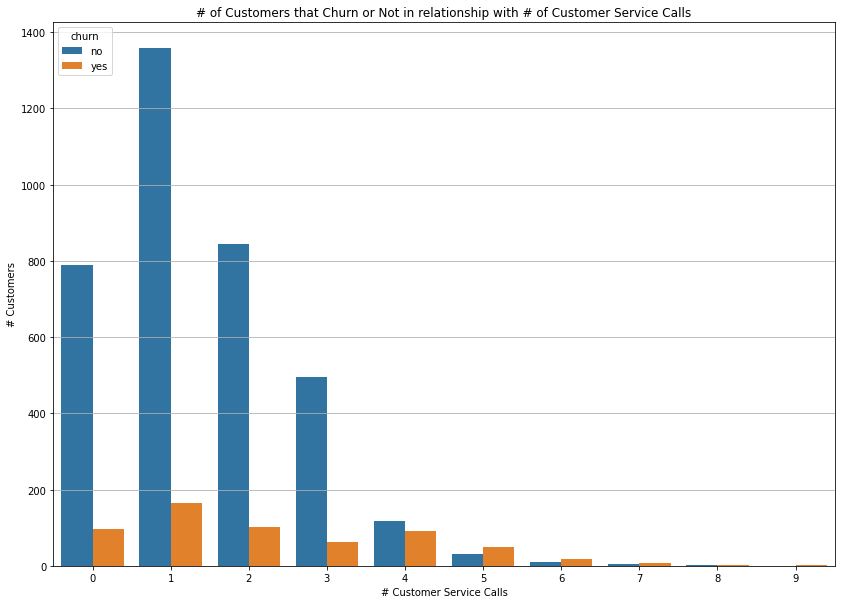

In [15]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(data = df, x = "number_customer_service_calls", hue = "churn")

plt.title("# of Customers that Churn or Not in relationship with # of Customer Service Calls")
plt.xlabel("# Customer Service Calls")
plt.ylabel("# Customers")
plt.grid(axis = "y")

We can see here that some customers churn without making customer service calls. We can also see that there are less and less customers who make customer service calls after they make 1 customer service call. This seems to suggest that the more calls to customer service a customer makes, the more a customer is likely to churn.

## Explanatory Data Analysis

In [16]:
df_eda = df.copy()

In [18]:
df_eda["churn"] = df_eda["churn"].replace({"no": 0, "yes": 1})
df_eda["churn"] = df_eda["churn"].astype(int)

Text(0.5, 1.0, 'Correlations between numerical values')

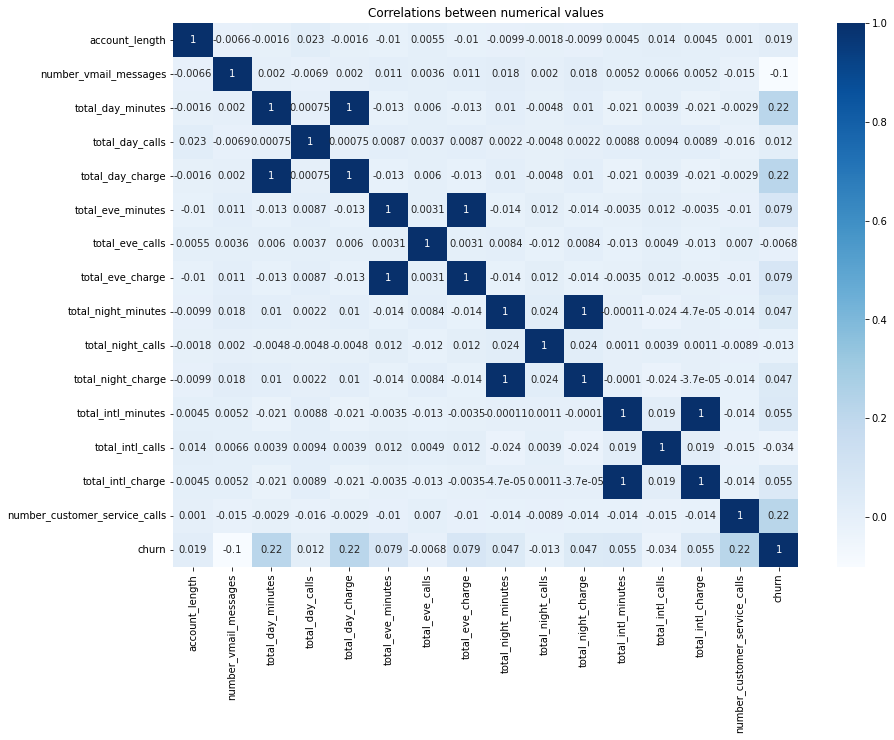

In [19]:
fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(df_eda.corr(), cmap = 'Blues', annot = True, ax = ax)
plt.title("Correlations between numerical values")

From the heatmap, we can see that there seems to be a correlation between whether a customer churns, the number of customer service calls the customer makes, and the total charge/minutes the customer makes per day.

While there is a 1:1 correlation between certain variables, looking at the data dictionary shows that those correlations are between related variables (ex: # int'l minutes, and the charge for int'l minutes). There should be no need to show a 1:1 relationship like this.

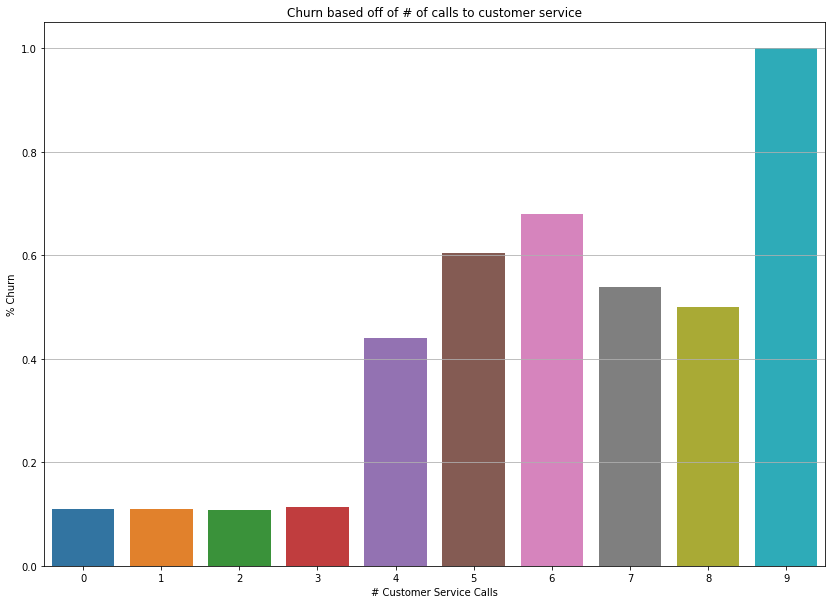

In [20]:
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df_eda, x = "number_customer_service_calls", y = "churn", ci = None)

plt.title("Churn based off of # of calls to customer service")
plt.xlabel("# Customer Service Calls")
plt.ylabel("% Churn")
plt.grid(axis = "y")

We can see that after 3 customer service calls, the percentage of people who churn rises by above 30%. We also see that at 9 customer service calls, customers absolutely churn.

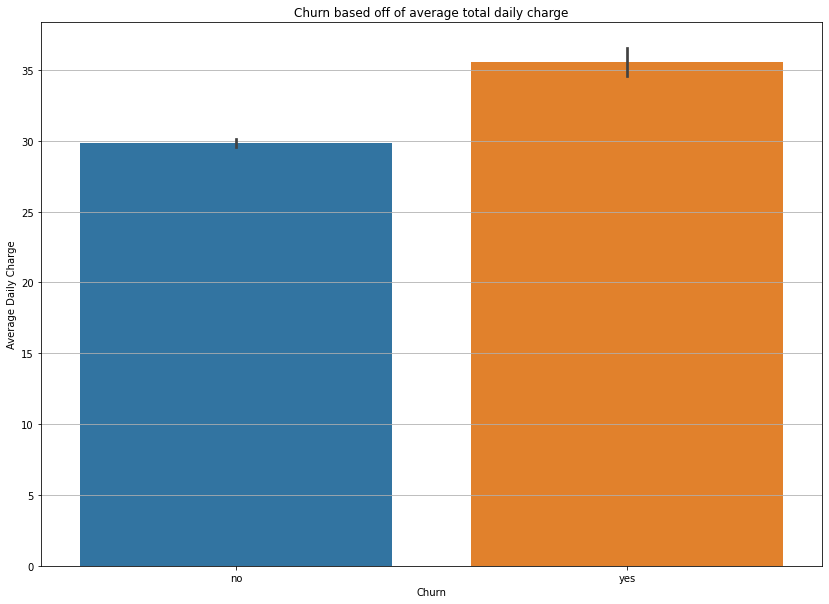

In [21]:
#Demonstrate the relationship between churn and total day charge
fig, ax = plt.subplots(figsize = (14,10))

sns.barplot(data = df, x = "churn", y = "total_day_charge")

plt.title("Churn based off of average total daily charge")
plt.xlabel("Churn")
plt.ylabel("Average Daily Charge")
plt.grid(axis = "y")

We can see that on average, customers that churn tend to pay more than customers who do not churn.